In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

import warnings 
from scipy import stats
warnings.filterwarnings('ignore')

In [169]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [170]:
df.shape

(1470, 35)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [172]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [173]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

we are droping these data because of no impact on 'Attrition'

In [174]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

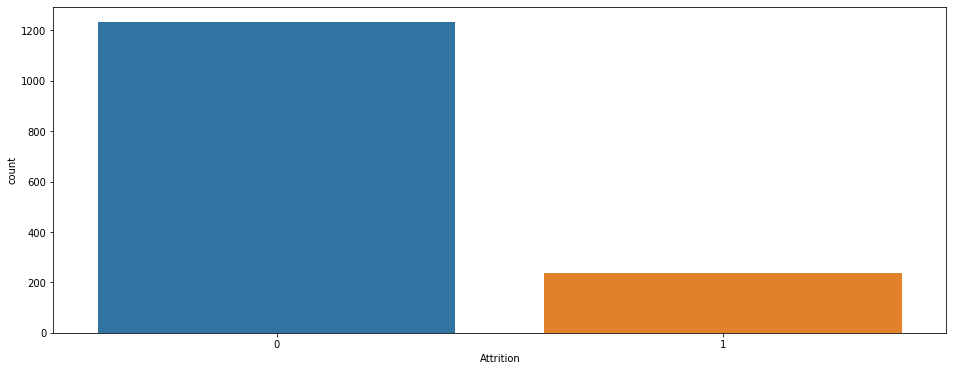

In [175]:
plt.figure(figsize=(16, 6))
sns.countplot(df['Attrition'])

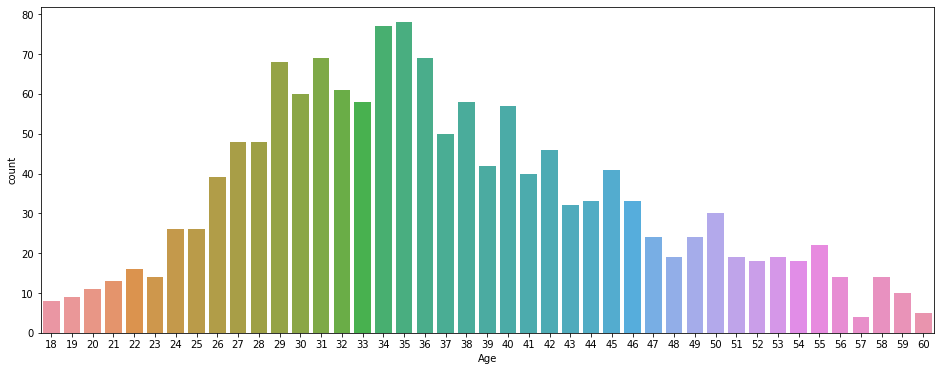

In [176]:
plt.figure(figsize=(16, 6))
sns.countplot(df['Age'])

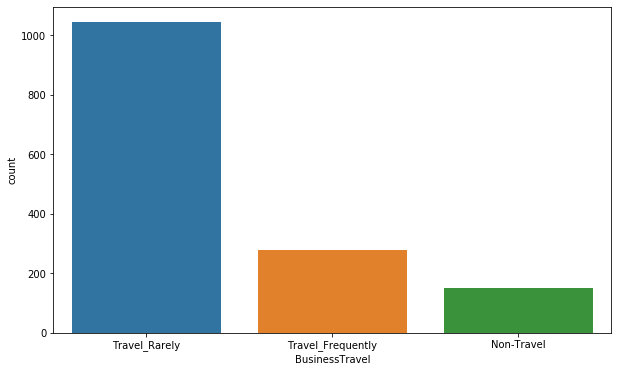

In [177]:
plt.figure(figsize=(10, 6))
sns.countplot(df['BusinessTravel'])

Employees who travel are more likely to quit then other employees.

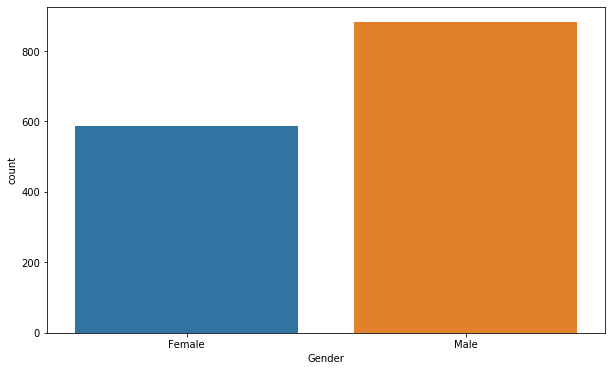

In [178]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Gender'])

Male employees are more likely to quit than Female employees.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

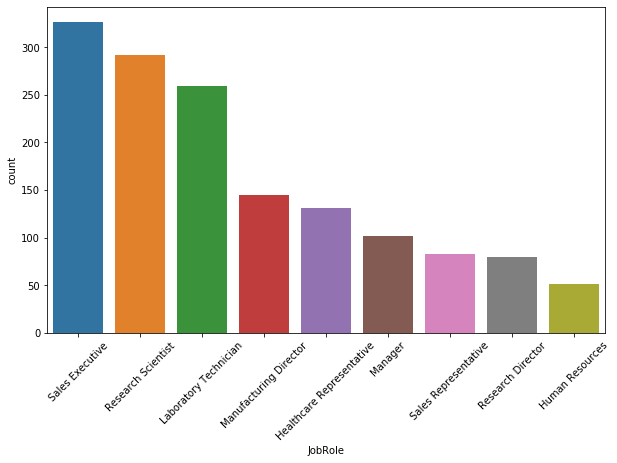

In [179]:
plt.figure(figsize=(10, 6))
sns.countplot(df['JobRole'])
plt.xticks(rotation=45)

'Sales Executive','Research Scientists' and 'Laboratory Tevhnician' are more likely to quit the workers in other positions.

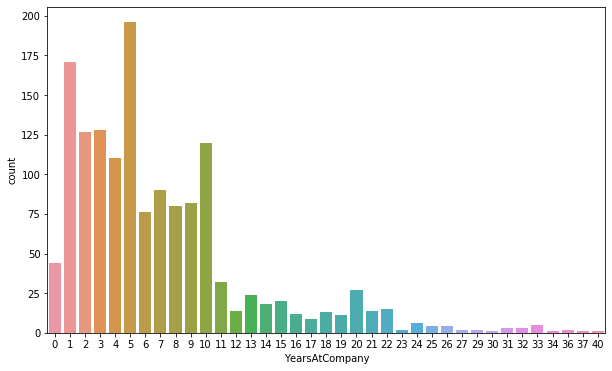

In [180]:
plt.figure(figsize=(10, 6))
sns.countplot(df['YearsAtCompany'])

Employees with experience of 1 year and 5 years are more likely to quit the job.

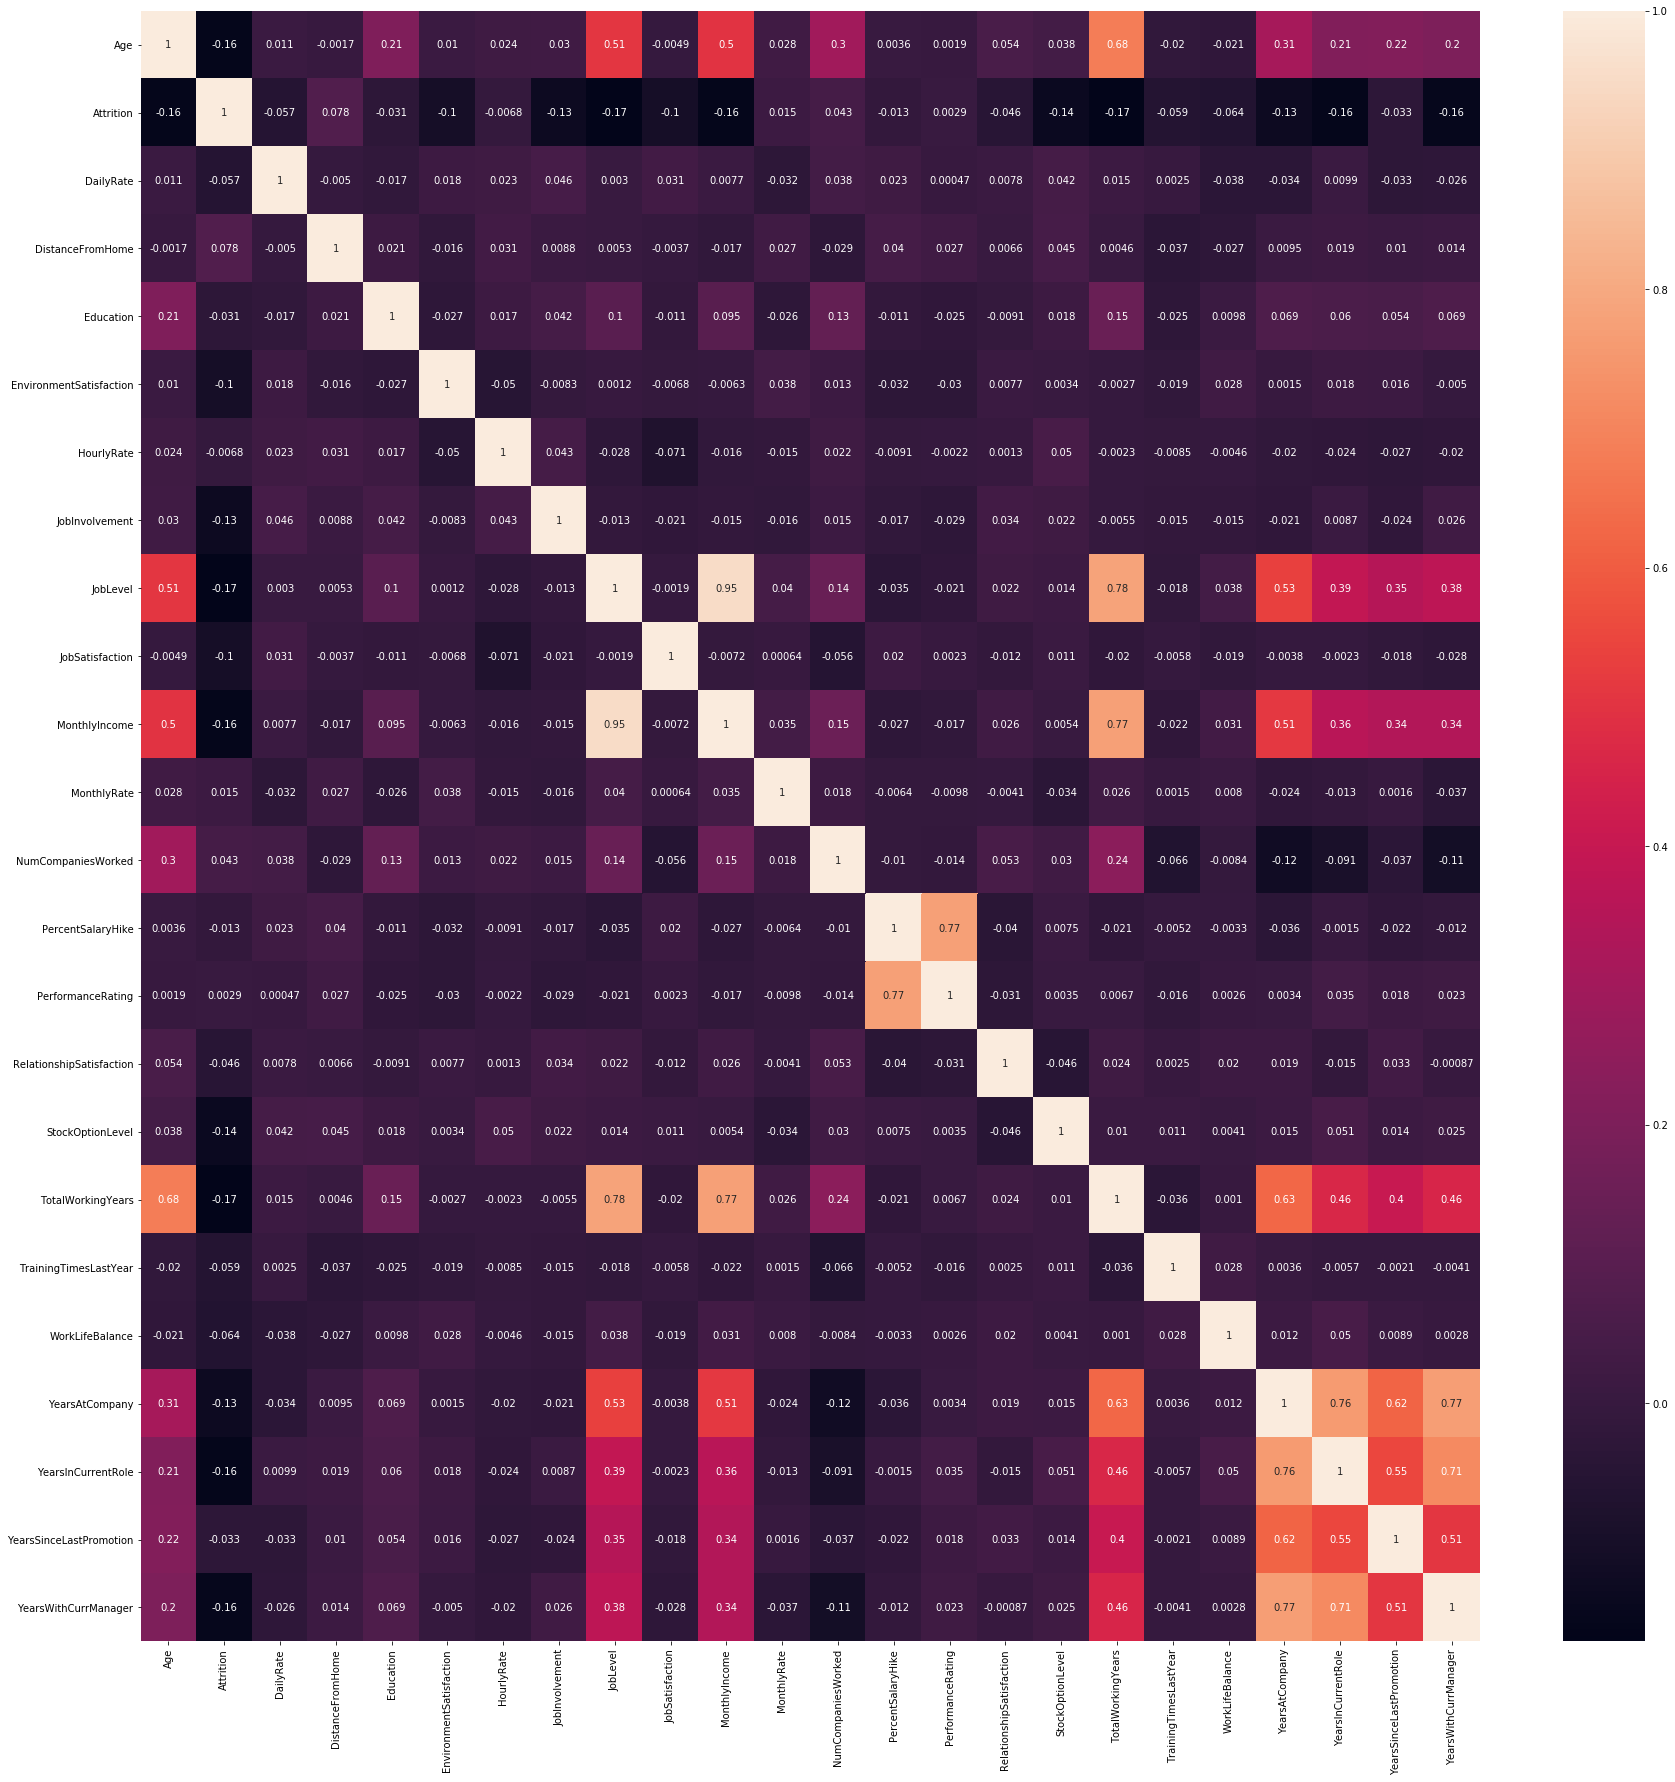

In [181]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True)

In [182]:
hr_df_cat = df[['Age','Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus', 'OverTime']].copy()
hr_df_cat.head()

,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,49,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,37,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,33,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,27,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [183]:
hr_df_cat = pd.get_dummies(hr_df_cat)
hr_df_cat.head()

,Age,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
1,49,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,37,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,33,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,27,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [184]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
target = hr_df_cat['Attrition']
features = hr_df_cat.drop('Attrition', axis = 1)
#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=10)
#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)
#predict the results for test
test_pred = model.predict(X_test)
#test the accuracy
accuracy_score(y_test, test_pred)

0.8163265306122449